In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("combined_csv.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'time', 'avg_rss12', 'var_rss12', 'avg_rss13',
       'var_rss13', 'avg_rss23', 'var_rss23', 'label'],
      dtype='object')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df.head()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,label
0,0,39.25,0.43,22.75,0.43,33.75,1.3,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.0,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.0,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.0,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.0,bending1


In [6]:
pr = ProfileReport(df)

In [7]:
pr.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

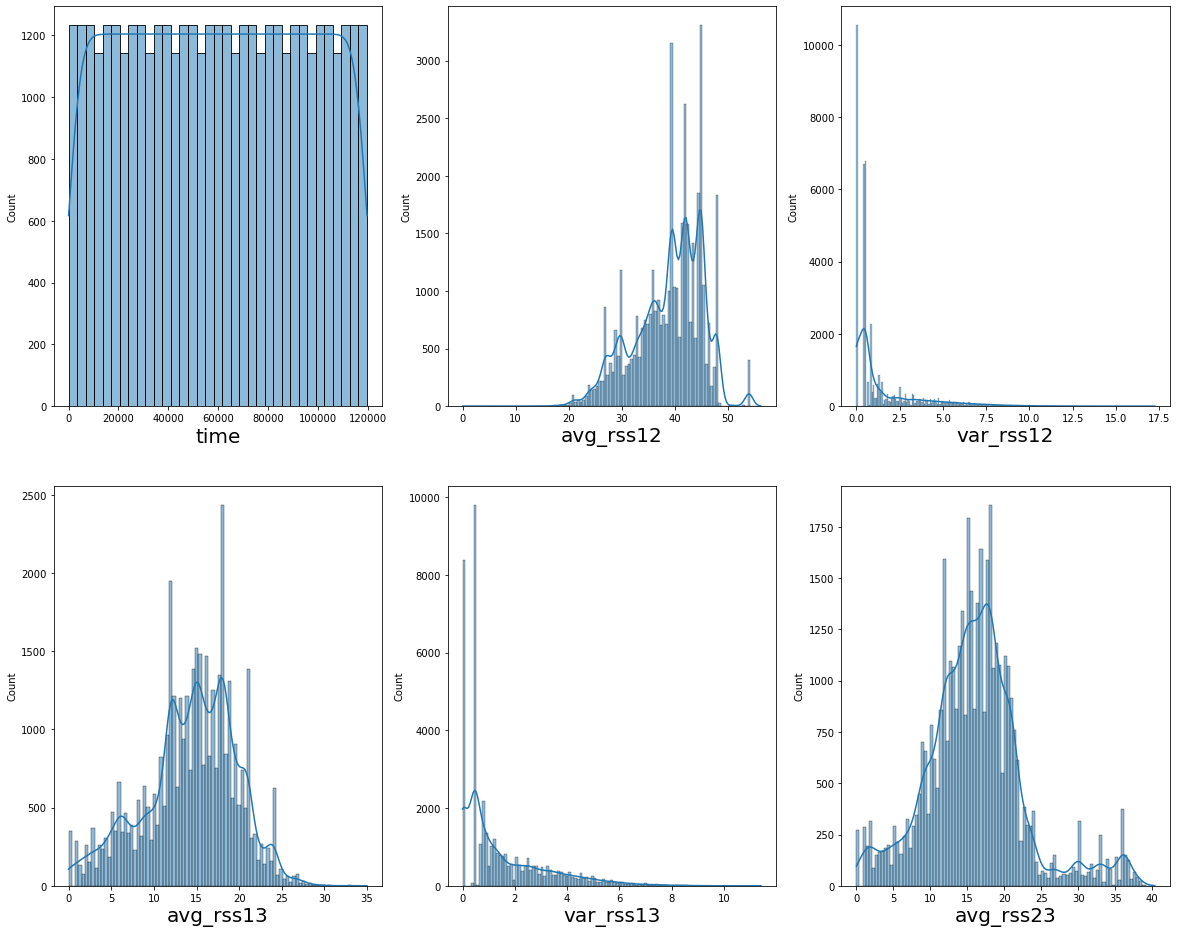

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=df[column],kde=True )
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

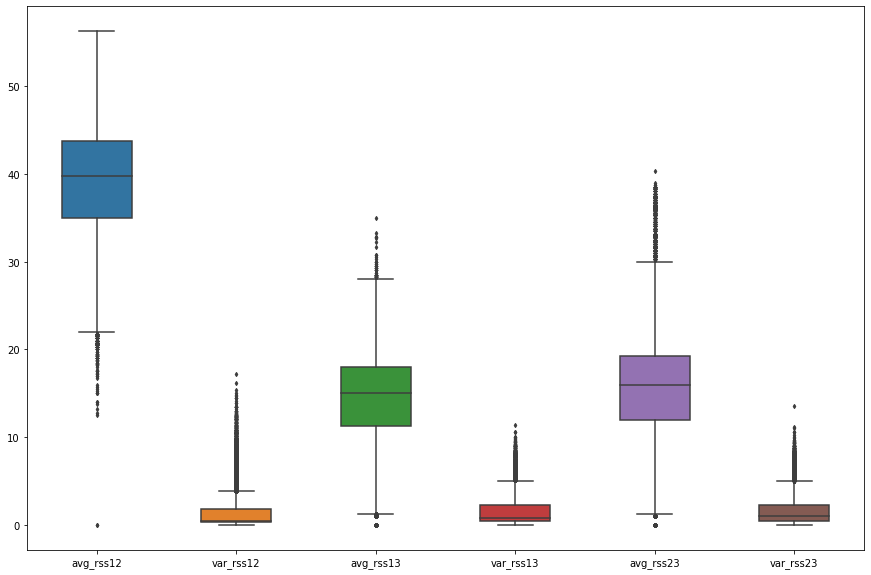

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df.drop('time', axis =1), width= 0.5,ax=ax,  fliersize=3)

In [10]:
X = df.drop('label', axis =1)
y = df['label']

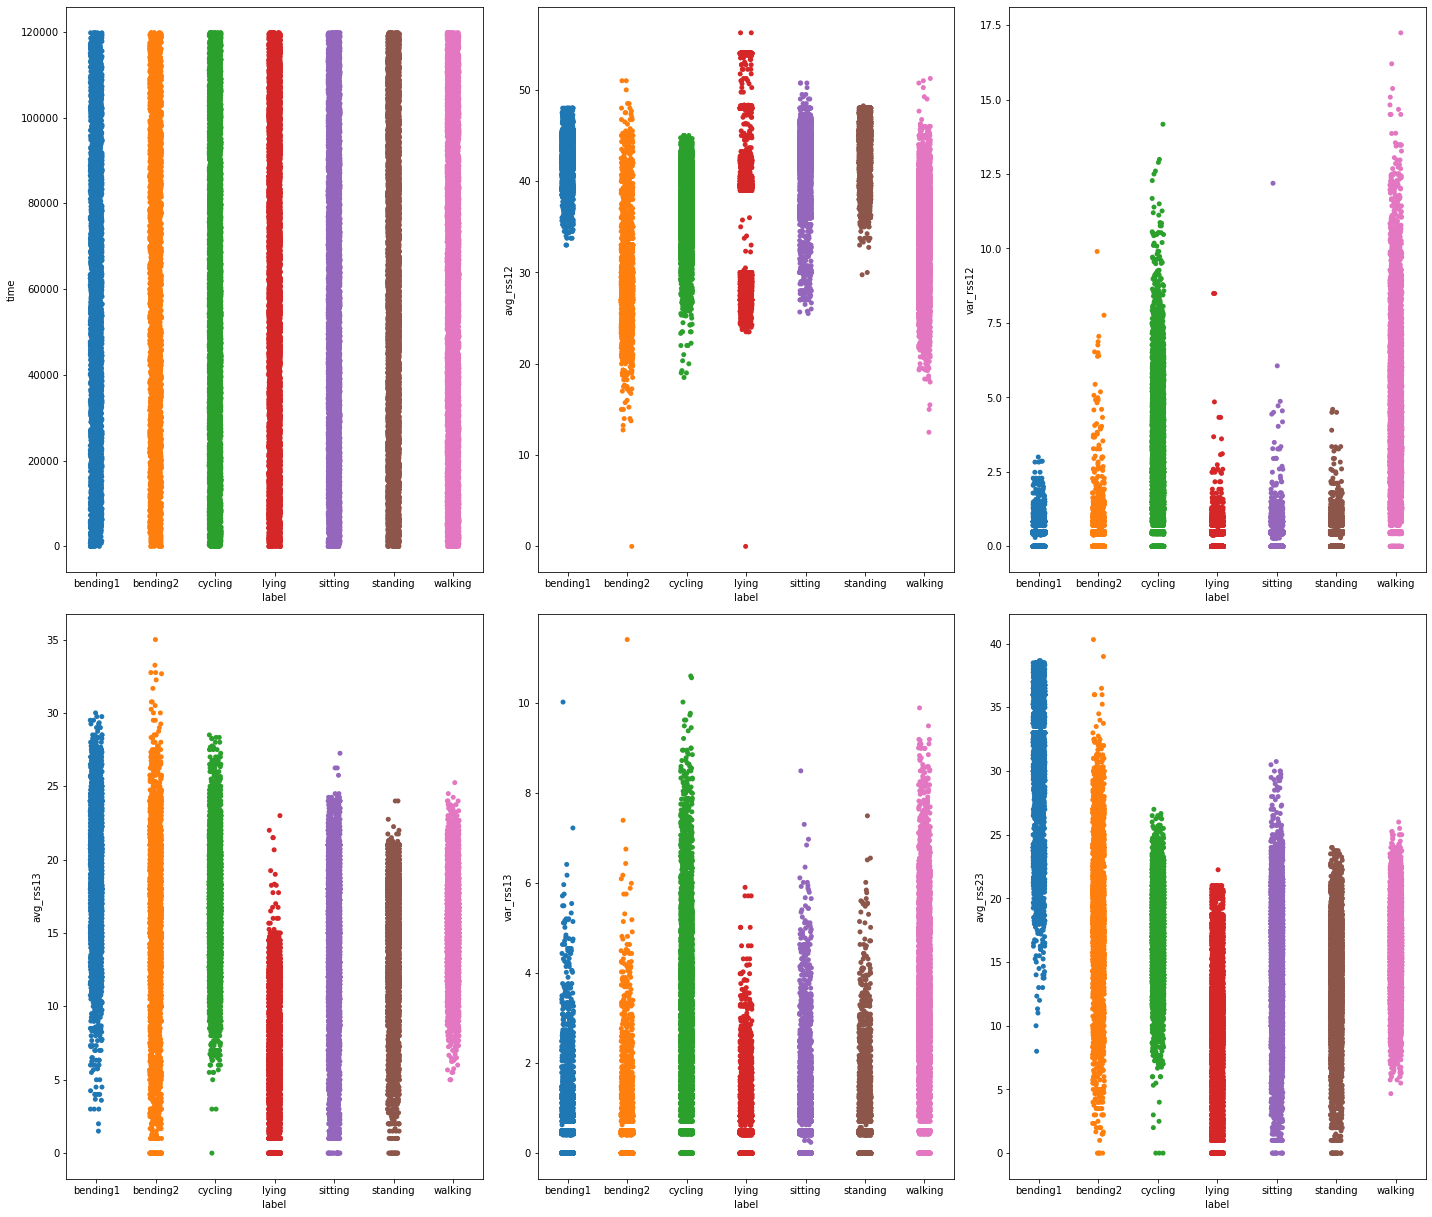

In [11]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[column])
    plotnumber+=1
plt.tight_layout()

# Remove Outlier

In [12]:
X.shape, y.shape

((42239, 7), (42239,))

In [13]:
from scipy import stats

In [14]:
z_scores = stats.zscore(df.drop('label', axis = 1))

In [15]:
z_scores

array([[-1.72849402,  0.05250514, -0.50252483, ..., -0.65400498,
         2.62989653, -0.19590387],
       [-1.72127706,  0.05250514, -0.50252483, ..., -0.91628015,
         2.51855353, -0.99001493],
       [-1.7140601 ,  0.05250514, -0.50252483, ..., -0.65400498,
         2.51855353, -0.99001493],
       ...,
       [ 1.71399671, -0.17630234,  3.03760278, ...,  0.59637664,
         0.18035042, -0.48300556],
       [ 1.72121367, -0.81538531, -0.07770951, ...,  2.26151899,
         0.06900741,  0.6531841 ],
       [ 1.72843063, -0.98580744,  0.79633578, ..., -0.62960729,
        -0.30213594,  0.94028578]])

In [16]:
abs_z_scores = np.abs(z_scores)

In [17]:
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [18]:
df = df[filtered_entries]

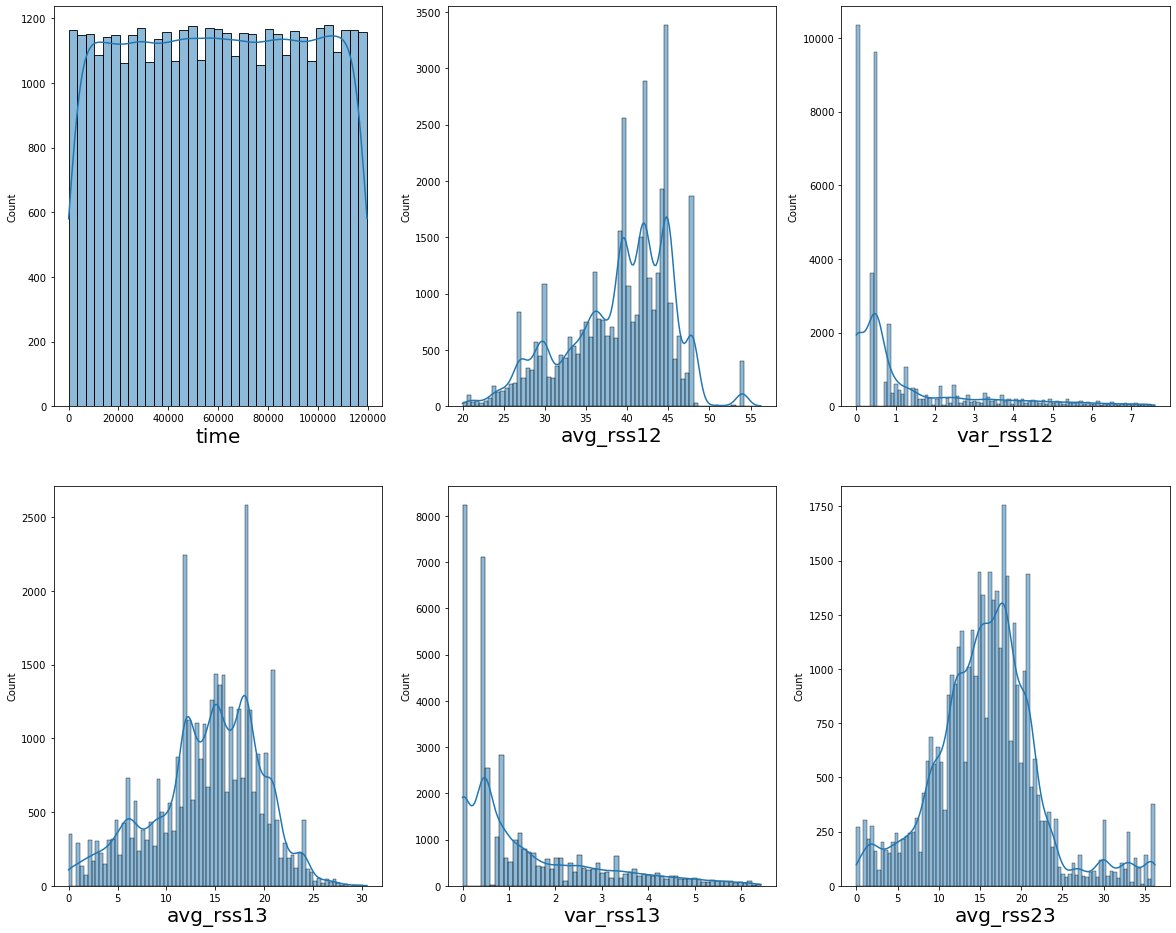

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(x=df[column],kde=True )
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

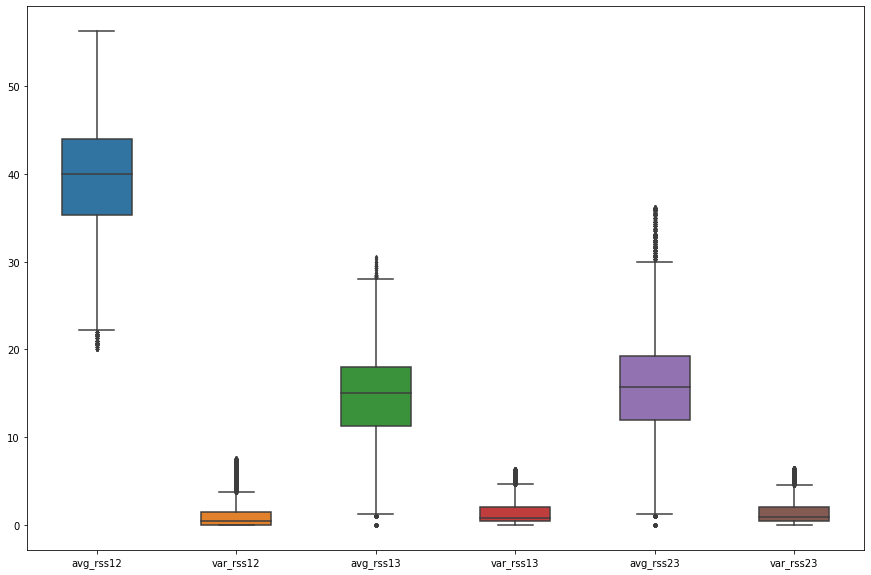

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df.drop('time', axis =1), width= 0.5,ax=ax,  fliersize=3)

In [21]:
df.columns

Index(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'label'],
      dtype='object')

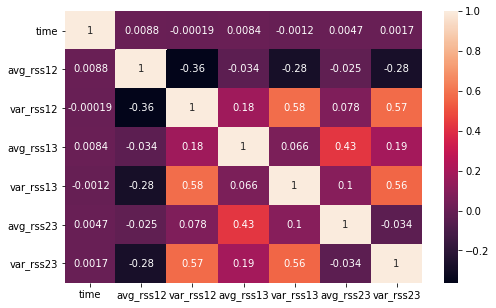

In [22]:
Selected_features = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
P = df[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(P.corr(), annot=True, cmap="rocket")
plt.show()

In [35]:
df.to_csv("After_EDA.csv")